# Code

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import GRU
from keras.utils import np_utils
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 

In [2]:
filename = '../Data/BERT2560/Combined/reshape_legalbert_2560.csv'

In [3]:
data = pd.read_csv(filename)

In [4]:
filename = filename[:filename.index('.')]

In [5]:
# data = data[:2000]
label = data['label']
features = data.drop(['uid', 'label'], axis=1)

In [6]:
del data

In [7]:
len(features)

39256

In [10]:
features = features.to_numpy()
features = features.reshape(39256, 5, 768)

In [11]:
X, a, y, b = train_test_split(features, label, random_state=42, stratify=label, test_size=0.3)
print(X.shape, y.shape, a.shape, b.shape)

Xv, Xt, yv, yt = train_test_split(a, b, random_state=42, stratify=b, test_size=0.4)
print(Xv.shape, Xt.shape, yv.shape, yt.shape)

# Xv = X[-6000:]
# X = X[:-6000]

(27479, 5, 768) (27479,) (11777, 5, 768) (11777,)
(7066, 5, 768) (4711, 5, 768) (7066,) (4711,)


In [35]:
# defining the LSTM model
model = Sequential()
model.add(Bidirectional(GRU(100, input_shape=(features.shape[1], features.shape[2]), return_sequences=True, activation='relu'))) #bidirectional lstm
model.add(Dropout(0.25)) #do for both bid and normal lstm 
model.add(Bidirectional(GRU(50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(20)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_bigru_legalbert_8' + filename + '_.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [38]:
history = model.fit(X, y, validation_data=(Xv, yv), epochs=1000, batch_size=8, callbacks=[es, mc])

Epoch 1/1000
3435/3435 [==============================] - ETA: 0s - loss: 0.6534 - accuracy: 0.6086
Epoch 1: val_accuracy improved from -inf to 0.65242, saving model to best_model_bigru_legalbert_8_.h5
3435/3435 [==============================] - 36s 9ms/step - loss: 0.6534 - accuracy: 0.6086 - val_loss: 0.6092 - val_accuracy: 0.6524
Epoch 2/1000
3432/3435 [============================>.] - ETA: 0s - loss: 0.6049 - accuracy: 0.6665
Epoch 2: val_accuracy improved from 0.65242 to 0.67832, saving model to best_model_bigru_legalbert_8_.h5
3435/3435 [==============================] - 37s 11ms/step - loss: 0.6048 - accuracy: 0.6665 - val_loss: 0.5877 - val_accuracy: 0.6783
Epoch 3/1000
3435/3435 [==============================] - ETA: 0s - loss: 0.5779 - accuracy: 0.6861
Epoch 3: val_accuracy did not improve from 0.67832
3435/3435 [==============================] - 41s 12ms/step - loss: 0.5779 - accuracy: 0.6861 - val_loss: 0.5880 - val_accuracy: 0.6748
Epoch 4/1000
3433/3435 [==============

Epoch 28/1000
3432/3435 [============================>.] - ETA: 0s - loss: 0.2409 - accuracy: 0.8997
Epoch 28: val_accuracy did not improve from 0.72318
3435/3435 [==============================] - 39s 11ms/step - loss: 0.2409 - accuracy: 0.8996 - val_loss: 0.7296 - val_accuracy: 0.7127
Epoch 29/1000
3435/3435 [==============================] - ETA: 0s - loss: 0.2287 - accuracy: 0.9051
Epoch 29: val_accuracy did not improve from 0.72318
3435/3435 [==============================] - 50s 15ms/step - loss: 0.2287 - accuracy: 0.9051 - val_loss: 0.7780 - val_accuracy: 0.7102
Epoch 30/1000
3435/3435 [==============================] - ETA: 0s - loss: 0.2228 - accuracy: 0.9082
Epoch 30: val_accuracy did not improve from 0.72318
3435/3435 [==============================] - 53s 16ms/step - loss: 0.2228 - accuracy: 0.9082 - val_loss: 0.7749 - val_accuracy: 0.7208
Epoch 31/1000
3432/3435 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9112
Epoch 31: val_accuracy did not impr

Epoch 56/1000
3431/3435 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9579
Epoch 56: val_accuracy did not improve from 0.73153
3435/3435 [==============================] - 43s 12ms/step - loss: 0.1139 - accuracy: 0.9579 - val_loss: 1.1151 - val_accuracy: 0.7202
Epoch 57/1000
3435/3435 [==============================] - ETA: 0s - loss: 0.1156 - accuracy: 0.9568
Epoch 57: val_accuracy did not improve from 0.73153
3435/3435 [==============================] - 50s 15ms/step - loss: 0.1156 - accuracy: 0.9568 - val_loss: 1.0002 - val_accuracy: 0.7212
Epoch 58/1000
3434/3435 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9570
Epoch 58: val_accuracy did not improve from 0.73153
3435/3435 [==============================] - 80s 23ms/step - loss: 0.1106 - accuracy: 0.9571 - val_loss: 0.9548 - val_accuracy: 0.7257
Epoch 59/1000
3435/3435 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.9578
Epoch 59: val_accuracy did not impr

In [39]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
saved_model = load_model('best_model_bigru_legalbert_8' + filename + '_.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X, y, verbose=0)
_, test_acc = saved_model.evaluate(Xt, yt, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.959, Test: 0.728


In [22]:
lst = [train_acc, test_acc]
df = pd.DataFrame(lst, index =['train_acc', 'test_acc'])
df.to_csv(filename +'best_model_bigru_legalbert_8.csv')

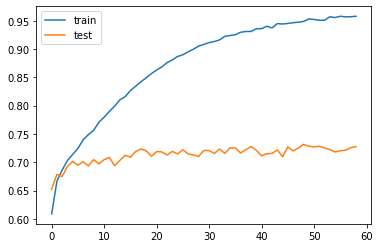

In [42]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig(filename + 'best_model_bigru_legalbert_8.png', bbox_inches='tight')
pyplot.show()


In [43]:
from matplotlib import pyplot as plt

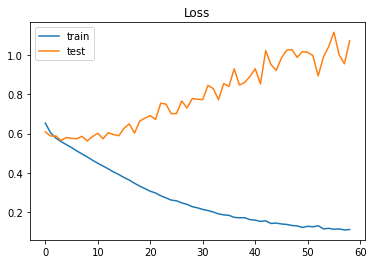

In [44]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
pyplot.savefig(filename + 'best_model_bigru_legalbert_8.png', bbox_inches='tight')
plt.legend()
plt.show();

In [16]:
sum(list(yt))

2031.0

In [17]:
len(yt)

4711

In [19]:
from sklearn.metrics import classification_report
predictions = saved_model.predict(Xt)
y_pred = np.argmax(predictions,axis=1)
trainReport = classification_report(yt, y_pred, output_dict=True)

lst = [format(trainReport['macro avg']['precision'], '.2f'), format(trainReport['macro avg']['recall'], '.2f'), format(trainReport['macro avg']['f1-score'], '.2f')]
df = pd.DataFrame(lst, index =['precision', 'recall', 'f1Score'])
df.to_csv(filename +'_bid_gru_legal_prec_recal_flsc_results.csv')
print(lst)

['0.28', '0.50', '0.36']


c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
Xt.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [23]:
from sklearn.metrics import classification_report
predictions = saved_model.predict(X)
y_pred = np.argmax(predictions,axis=1)
trainReport = classification_report(y, y_pred, output_dict=True)

lst = [format(trainReport['macro avg']['precision'], '.2f'), format(trainReport['macro avg']['recall'], '.2f'), format(trainReport['macro avg']['f1-score'], '.2f')]
df = pd.DataFrame(lst, index =['precision', 'recall', 'f1Score'])
df.to_csv(filename +'_bid_gru_legal_prec_recal_flsc_results_train.csv')
print(lst)

['0.28', '0.50', '0.36']


c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
yp = (saved_model.predict(Xt) > 0.5).astype('int32') 

print(yp)

[[1]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


In [28]:
from sklearn.metrics import confusion_matrix

      1     0
1  1269   762
0   519  2161


In [32]:
yp = (saved_model.predict(X) > 0.5).astype('int32') 
matrix = confusion_matrix(y,yp, labels=[1,0])
cm = pd.DataFrame(matrix, index=['1','0'],columns=['1','0'])
from sklearn.metrics import accuracy_score
print("Test Accuracy Score: %.3f" %(accuracy_score(y,yp)))

from sklearn.metrics import recall_score
print("Test Recall Score: %.3f" %(recall_score(y,yp)))

from sklearn.metrics import precision_score
print("Test Precision Score: %.3f" %(precision_score(y,yp)))

from sklearn.metrics import f1_score
print("Test F1 Score: %.3f" %(f1_score(y,yp)))

Test Accuracy Score: 0.959
Test Recall Score: 0.925
Test Precision Score: 0.980
Test F1 Score: 0.951


In [30]:
yp = (saved_model.predict(Xt) > 0.5).astype('int32') 
matrix = confusion_matrix(yt,yp, labels=[1,0])
cm = pd.DataFrame(matrix, index=['1','0'],columns=['1','0'])
from sklearn.metrics import accuracy_score
print("Test Accuracy Score: %.3f" %(accuracy_score(yt,yp)))

from sklearn.metrics import recall_score
print("Test Recall Score: %.3f" %(recall_score(yt,yp)))

from sklearn.metrics import precision_score
print("Test Precision Score: %.3f" %(precision_score(yt,yp)))

from sklearn.metrics import f1_score
print("Test F1 Score: %.3f" %(f1_score(yt,yp)))

Test Accuracy Score: 0.728
Test Recall Score: 0.625
Test Precision Score: 0.710
Test F1 Score: 0.665


NameError: name 'valid_acc' is not defined